## Splitting, lumping, & the logic of elaboration

Hochschild 2000: "For several centuries taxonomists of the natural world have been divided into lumpers, who seek to merge a larger number of proposed species or genera into a smaller number, and splitters, who seek to move in the opposite direction."

### Lumpers, splitters, and racism

1. Splitters: racism as separate from individuals' values, ideology, education, ect.

2. Lumpers: racism as linked to values and emotions

[your thoughts here]

### Logic of elaboration: spurious, intervening, and interactive associations

### Spurious relationship with prior control
<img src="spuriousfirefighters.png" width="400" align="left">

### Intervening relationship with subsequent control
<img src="interveningabortion.png" width="600" align="left">

### **Interactive** relationship with subsequent control
<img src="abortioninteraction.jpeg" width="600" align="left">

### Did Du Bois controll for age because of possible spurious, intervening, or interaction relationship?

[your answer here]

<img src="https://cdn.loc.gov/service/pnp/ppmsca/33800/33872v.jpg" width="400" align="left">

### Nerds on facebook discussing crosstabs

<img src="pacewiczcross.png" width="400" align="left">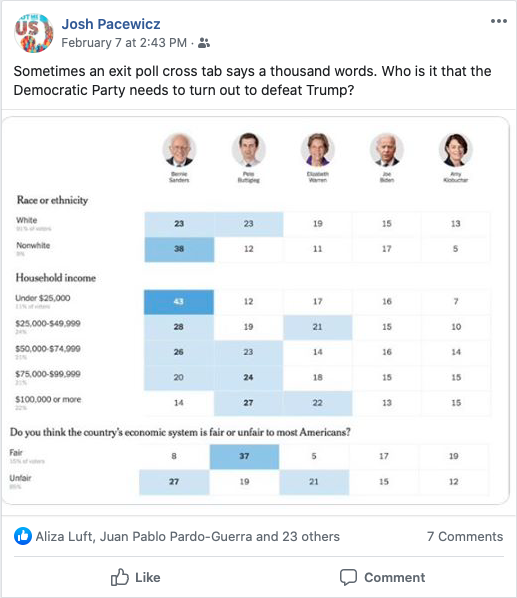

<img src="eatontopacewicz.png" width="400" align="left">

## Crosstabs with means, percentiles, and years

### "The Financialization of U.S. Higher Education."

Lets's replicate some crosstabs from the paper

In [141]:
set more off
capture log close
log using wlecture_morecross_log20200212.log




---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/Charlie/gradstats2/week4/wlecture_morecross_log20200212.log
  log type:  text
 opened on:  12 Feb 2020, 11:41:35


In [142]:
unzipfile higheredfinancializationdata.zip, replace

    inflating: higheredfinancialization.dta

successfully unzipped higheredfinancializationdata.zip to current directory
total processed:  1
        skipped:  0
      extracted:  1


In [143]:
use "higheredfinancialization.dta", clear

In [144]:
gen sector=owner_pe
replace sector=3 if owner_pe<4
drop if owner_pe==.
label define sector 3 "for-profit" 4 "private" 5 "state" 6 "community"
label values sector sector
codebook sector


(143 missing values generated)

(17,081 real changes made)

(143 observations deleted)




---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sector                                                                                                                                                                                                                                              (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (float)
                 label:  sector

                 range:  [3,6]                        units:  1
 

### Time as a crosstab

first as a table

In [146]:
table year sector, c(sum fte_count) format(%12.0fc)


------------------------------------------------------------------
          |                         sector                        
     year |   for-profit       private         state     community
----------+-------------------------------------------------------
     1990 |      285,864     2,419,532     5,313,756     3,044,558
     1991 |      315,353     2,472,085     5,447,900     3,271,924
     1992 |      376,087     2,528,000     5,513,360     3,529,975
     1993 |      360,960     2,588,040     5,522,717     3,622,829
     1994 |      683,009     2,636,149     5,481,835     3,559,126
     1995 |      611,589     2,655,103     5,475,290     3,493,564
     1996 |      611,433     2,674,205     5,489,072     3,423,436
     1997 |      585,732     2,613,330     5,514,377     3,374,353
     1998 |      580,237     2,642,502     5,556,714     3,404,947
     1999 |      743,122     2,706,374     5,613,075     3,409,596
     2000 |      639,682     2,753,309     5,695,975     3,47

then as a graph (much better)

In [150]:
ssc install blindschemes

checking blindschemes consistency and verifying not already installed...

the following files already exist and are different:
    /Users/Charlie/Library/Application Support/Stata/ado/plus/s/scheme-plotplain.scheme
    /Users/Charlie/Library/Application Support/Stata/ado/plus/s/scheme-plotplainblind.scheme
    /Users/Charlie/Library/Application Support/Stata/ado/plus/s/scheme-plottig.scheme
    /Users/Charlie/Library/Application Support/Stata/ado/plus/s/scheme-plottigblind.scheme

no files installed or copied
(no action taken)


r(602);


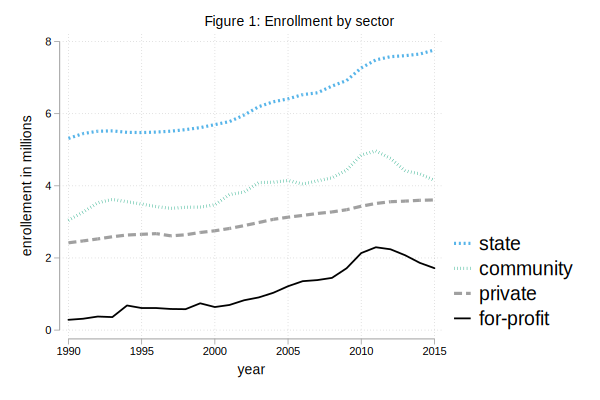

In [157]:
preserve

collapse (sum) fte_count, by(year sector)

qui xtset sector year

qui replace fte_count=fte_count/1000000

xtline fte_count, overlay scheme(plotplainblind) legend(order(3 4 2 1) size(large)) ///
ytitle(enrollement in millions) title("Figure 1: Enrollment by sector", span)  ///
plot1opts(lwidth(medthick)) plot2opts(lwidth(thick)) plot3opts(lwidth(thick)) plot4opts(lwidth(thick))

graph display

restore

### Means as crosstab values

Figure 3. Spending per student on interest for institutional debt by sector

First as a table

In [158]:
egen interest2= rowtotal(instruction07 research07 instsupp07 acadsupp07 ///
studserv07 auxiliary07 hospital07 opermain07 other07)
replace interest01=interest2 if interest01==.



(135,169 real changes made)


In [163]:
preserve
collapse (sum) fte_count interest01 (first) cpi_scalar, by(sector year)
gen interest_fte = (interest01 / cpi_scalar_2017) / fte_count 

table year sector if year>2002 & sector>3, c(mean interest_fte) format(%12.0fc)

restore

### Again, a graph of these mean cross tabs by sector and year is better

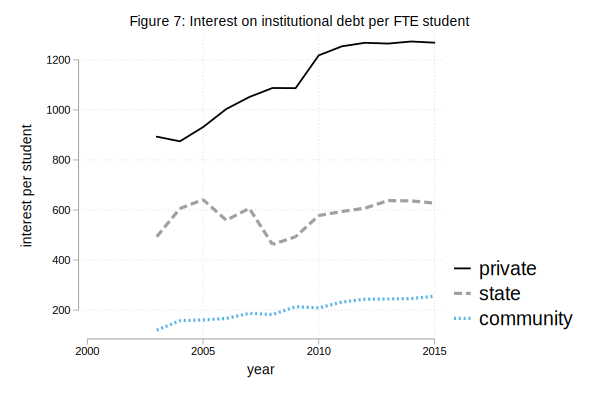

In [164]:
preserve
collapse (sum) fte_count interest01 (first) cpi_scalar, by(sector year)
qui gen interest_fte = (interest01 / cpi_scalar_2017) / fte_count 
qui xtset sector year
xtline interest_fte if year>2002 & sector>3, overlay legend(order(1 2 3) size(large)) ///
ytitle(interest per student) title("Figure 7: Interest on institutional debt per FTE student", span) scheme(plotplainblind) ///
plot1opts(lwidth(medthick)) plot2opts(lwidth(thick)) plot3opts(lwidth(thick))
graph display
restore

### Percentiles as crosstab categories

Calculating percentiles within years and sectors requires some ugly code including Stata's import egen command

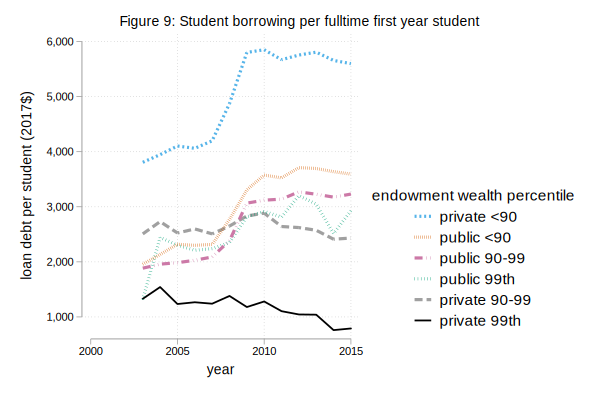

In [98]:
preserve
qui keep if sector>3 & sector<6 & year>2002
qui gen endowpriv=endowment02 if sector==4
qui gen endowpub=endowment02 if sector==5
qui replace endow_assets=endowment02 if endow_assets==.
qui bysort owner_pe year: egen endow99=pctile(endow_assets), p(99)
qui bysort owner_pe year: egen endow90=pctile(endow_assets), p(90)
qui gen endowpctile=1
qui replace endowpctile=2 if endow_assets<endow99
qui replace endowpctile=3 if endow_assets<endow90
qui replace endowpctile=. if endow_assets==.
qui replace endowpctile=endowpctile+3 if owner_pe==5
qui replace loan_amount_ftfrosh = loan_amount_ftfrosh / cpi_scalar_2017
qui collapse (mean) loan_amount_ftfrosh, by(endowpctile year)
qui label define endowpctile 1 "private 99th" 2 "private 90-99" 3 "private <90" ///
4 "public 99th" 5 "public 90-99" 6 "public <90"
qui label values endowpctile endowpctile
qui xtset endowpctile year

xtline loan_amount_ftfrosh, overlay ///
legend(title("endowment wealth percentile", ///
size(medium)) order(3 6 5 4 2 1) size(medium)) ///
ytitle("loan debt per student (2017$)") ///
title("Figure 9: Student borrowing per fulltime first year student", span) ///
plot1opts(lwidth(medthick)) plot2opts(lwidth(thick)) plot3opts(lwidth(thick)) ///
plot4opts(lwidth(thick)) plot5opts(lwidth(thick)) plot6opts(lwidth(thick)) ///
scheme(plotplainblind) ylabel(, format(%9.0fc))

graph display
restore

### Is "The Financialization of Higher Education" a splitter, a lumper, or both? Why?

[your answer here]

### A few more good exploration commands/tools

### 1. "describe"

In [166]:
describe  endow_assets loan_amount_ftfrosh, fullnames


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
endow_assets    float   %9.0g                 
loan_amount_ftfrosh
                float   %9.0g                 PEstudy loan dollars per student (fulltime frosh) 2000 to 2016


### 2. The "%head", %tail, and "%browse" magics (+ "gsort")

In [168]:
%head unitid inst_name year endow_assets loan_amount_ftfrosh

,unitid,inst_name_new,year,endow_assets,loan_amount_ftfrosh
1,119085,MONTESSORI TEACHER EDUCATION CENTER-SAN FRAN BAY,1990,.,.
2,125125,VIDEO TECHNICAL INSTITUTE,1990,.,.
3,219347,SOUTH DAKOTA SCHOOL OF MINES AND TECHNOLOGY,1990,.,.
4,125347,WEIMER COLLEGE,1990,.,.
5,156745,GEORGETOWN COLLEGE,1990,25740586,.
6,363509,OKLAHOMA JUNIOR COLLEGE,1990,.,.
7,132453,BARNA INSTITUTE OF HEALTH SCIENCES,1990,.,.
8,125471,WEST LOS ANGELES COLLEGE,1990,.,.
9,107433,NATIONAL EDUCATION CENTER-AR COLL OF TECH CAMPUS,1990,.,.
10,167288,MASSACHUSETTS COLLEGE OF LIBERAL ARTS,1990,290972.47,.


In [109]:
%tail unitid inst_name year sector endow_assets loan_amount_ftfrosh

,unitid,inst_name_new,year,sector,endow_assets,loan_amount_ftfrosh
182873,434469,NEW PROFESSIONS TECHNICAL INSTITUTE,2015,for-profit,.,3432
182874,115533,HEALD COLLEGE-CONCORD,2015,for-profit,.,.
182875,188650,ALLEN SCHOOL-BROOKLYN,2015,for-profit,.,6227.4805
182876,220118,ELECTRONIC COMPUTER PROGRAMMING COLLEGE INC,2015,for-profit,.,5192.7002
182877,461652,D'SHAW INSTITUTE OF COSMETOLOGY,2015,for-profit,.,8700
182878,484039,BEAUTY ANATOMY INSTITUTE OF COSMETOLOGY AND WE...,2015,for-profit,.,3964
182879,440101,EMPIRE BEAUTY SCHOOL-KENNESAW,2015,for-profit,.,8475.3008
182880,188146,SANTA FE UNIVERSITY OF ART AND DESIGN,2015,for-profit,.,5297.7603
182881,186584,SETON HALL UNIVERSITY,2015,private,267153856,6787.6201
182882,234225,WASHINGTON COUNTY SKILL CENTER,2015,community,.,.


In [ ]:
gsort -year

In [ ]:
%browse unitid inst_name year endow_assets loan_amount_ftfrosh

### 3. Check missing data with mdesc and if statements

In [121]:
mdesc endow_assets loan_amount_ftfrosh
tab year if loan_amount_ftfrosh==.
tab year if loan_amount_ftfrosh!=.



    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
   endow_assets |     155,631        182,882          85.10
   loan_amoun~h |      97,091        182,882          53.09
----------------+-----------------------------------------------


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1990 |      5,310        5.47        5.47
       1991 |      5,320        5.48       10.95
       1992 |      5,400        5.56       16.51
       1993 |      5,422        5.58       22.09
       1994 |      8,828        9.09       31.19
       1995 |      8,686        8.95       40.13
       1996 |      8,566        8.82       48.96
       1997 |      6,858        7.06       56.02
       1998 |      6,737        6.94       62.96
       1999 |      7,351        7.57       70.53
       2000 |      2,671        2.75       73.28
       2001 |      2,530        2.61       7


(bin=43, start=10000815, width=46062141)


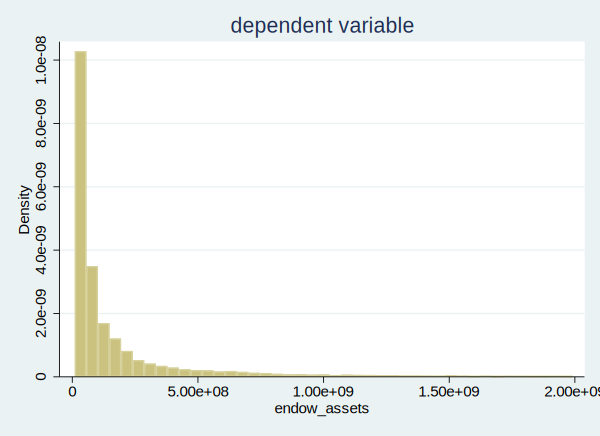


no observations

. foreach var in loan_amount_ftfrosh {
(bin=10, start=0, width=1982.5641)


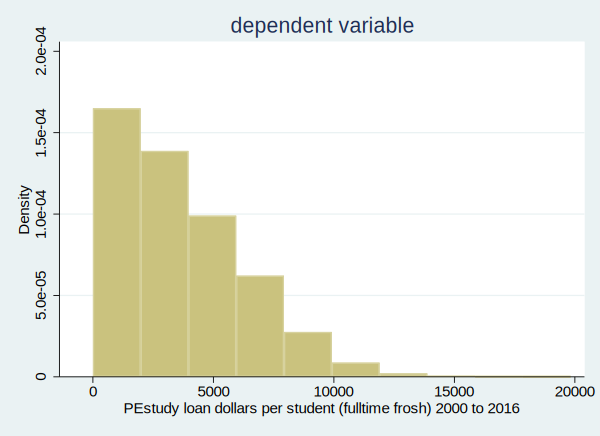

In [170]:
foreach var in endow_assets fte_count {
    histogram `var' if `var'<2000000000 & `var'>10000000, title(dependent variable) name(`var', replace)
}

foreach var in loan_amount_ftfrosh {
    histogram `var' if `var'<20000, title(dependent variable) name(`var', replace) bin(10)
}